In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
# Scaling the x matrix :  means the values are ranging between 0-255, now after scaling they will range from 0-1
x_train = x_train/255
x_test = x_test/255

In [6]:
# Converting the dataset's images from 28 x 28 to 1D array of 784 elements
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(1000, input_shape = (784,), activation = 'sigmoid'),
    keras.layers.Dense(1000, activation = 'sigmoid'),
    keras.layers.Dense(1000, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 79s 41ms/step - loss: 0.3601 - accuracy: 0.8856
Epoch 2/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.1309 - accuracy: 0.9603
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0873 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0631 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0472 - accuracy: 0.9852


313/313 [==============================] - 3s 9ms/step


Text(70.72222222222221, 0.5, 'Truth')

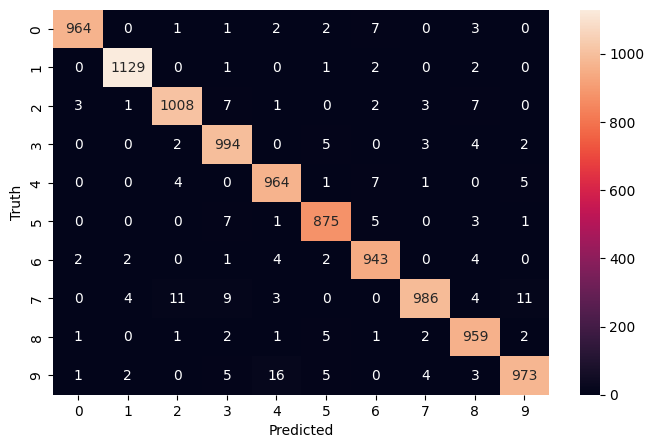

In [9]:
# Showing the Confusion Matrix for the model
import seaborn as sn
y_predict = model.predict(x_test_flattened)
y_predict_labels = np.argmax(y_predict, axis = 1)
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [10]:
# Evaluating the model based on test set ---- passing the testing feature values and the expected labels, so we get the accuracy and loss
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0775 - accuracy: 0.9795


[0.07749984413385391, 0.9794999957084656]